In [67]:
import numpy as np

In [2]:
def mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2)/y.size

In [3]:
y      = np.array([1,   2,   3,    4])
y_hat1 = np.array([1.2, 1.9, 2.9,  4.2]) 
mean_squared_error(y_hat1, y)

0.025000000000000022

In [132]:
y_hat2 = np.array([2.2, 0.9, 2.9,  5.2]) 
mean_squared_error(y_hat2, y)

1.0250000000000004

In [4]:
def cross_entropy_error(y_hat, y):
    return -np.sum(y*np.log(y_hat + 1e-7))

In [5]:
y = np.array([0, 1, 0, 0, 0])

In [6]:
y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0])

In [7]:
cross_entropy_error(y_hat1, y)

0.3566748010815999

In [8]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0])

In [9]:
cross_entropy_error(y_hat2, y)

2.9957302735559908

In [10]:
import mnist

my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [11]:
(train_images, train_labels), (_, _) = my_mnist.load()

In [12]:
train_size = train_images.shape[0]
batch_size = 32

In [13]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[34273 50198 50207 48204 39354 48255 32082 42201 19827 43441 14937 49955
  2930  1701   756 40732  3730 20885 28841 33258 33113  9885 38837 11512
 52767  5284 12874  6015 27340 53637 18988 50902]


In [14]:
train_size

60000

In [15]:
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [16]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [17]:
cross_entropy_error(y_hat_batch, y_batch)

0.8573989640459981

In [18]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x))/h

In [19]:
def func(x):
    return x**2 + 0.1*x

In [20]:
numerical_diff(func, 0.8)

0.0

In [21]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [22]:
numerical_diff(func, 0.8)

1.6999999999994797

In [23]:
numerical_diff(func, 0.2)

0.49999999999994493

In [24]:
def func(x):
    return x[0]**2 + x[1]**2

def func_tmp1(x0):
    return x0**2 + 4.0**2

In [25]:
numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [26]:
def func_tmp2(x1):
    return 3.0**2 + x1**2

In [27]:
numerical_diff(func_tmp2, 4.0)

7.999999999999119

#Numerical Gradient

In [28]:
def func2(x):
    return x[0]**2 + x[1]**2

In [29]:
def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

In [30]:
def _numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [31]:
def _numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad

In [32]:
_numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [33]:
_numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [34]:
_numerical_gradient(func2, np.array([3.0, 4.0]))

array([6., 8.])

In [35]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [36]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001)

array([5.65680105e-06, 2.02028609e-06])

#SimpleNet

In [40]:
class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss

In [41]:
net = SimpleNet()
print(net.w)

[[ 0.35290519 -0.76294904  0.37085037]
 [ 0.30146929  0.19240449  0.67984147]]


In [42]:
x = np.array([0.7, 0.19])
p = net.predict(x)
print(p)

[ 0.3043128  -0.49750748  0.38876514]


In [43]:
np.argmax(p)

2

In [44]:
y = np.array([0, 1, 0])
net.loss(x, y)

1.732657235166521

In [45]:
y = np.array([0, 0, 1])
net.loss(x, y)

0.846384953433088

In [46]:
def loss_function(w):
    return net.loss(x, y)

In [47]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.27595631  0.12376967 -0.39972598]
 [ 0.07490243  0.03359462 -0.10849705]]


In [48]:
loss_function = lambda w: net.loss(x, y)

In [49]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.27595631  0.12376967 -0.39972598]
 [ 0.07490243  0.03359462 -0.10849705]]


#TwoLayerNet class

In [51]:
class Activations:
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))

In [52]:
class Errors:
    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [7]:
import activations
import errors

In [10]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads
    
 

#Train TwoLayerNet

In [1]:
import numpy as np
import mnist
from two_layer_net import TwoLayerNet

import matplotlib.pyplot as plt


In [2]:
my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [3]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [11]:
network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [12]:
network.params

{'w1': array([[-0.00302928,  0.00473432,  0.01680218, ...,  0.0111888 ,
          0.00189124,  0.01692891],
        [ 0.01977142,  0.00983023, -0.01610206, ..., -0.02294623,
          0.00853678,  0.00011609],
        [-0.00606599,  0.01258069,  0.0024503 , ...,  0.00325707,
          0.00414444,  0.01072886],
        ...,
        [ 0.0036787 , -0.00816988,  0.01049916, ..., -0.00317924,
          0.00765429,  0.00921063],
        [ 0.00757741,  0.01225088, -0.00721949, ..., -0.00481698,
          0.01300768,  0.01205332],
        [ 0.01483452, -0.02278116,  0.00371304, ..., -0.00144401,
          0.00933456,  0.00823516]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:
iterations = 10 #10000
train_size = x_train[:100].shape[0]
batch_size = 2 #100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [14]:
train_losses = []
train_accs = []
test_accs = []

In [15]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.09871666666666666, 0.098


KeyboardInterrupt: 

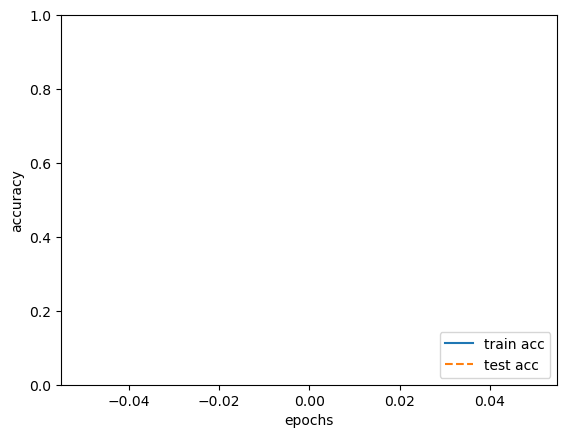

In [16]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#Backpropegation

In [17]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None
        self.activations = Activations()

    def forward(self, x):
        out = self.activations.sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx
    
class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dw = None
        self.db = None

    def forward(self, x):
        # 
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.w) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y_hat = None    
        self.y = None    
        self.activations = Activations()
        self.errors = Errors()
        
    def forward(self, x, y):
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        #if self.y.size == self.y_hat.size: # one hot encoding
        
        dx = (self.y_hat - self.y) / batch_size
        
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        """
        return dx

In [18]:
import numpy as np
from activations import Activations
from errors import Errors

In [19]:
from collections import OrderedDict

In [20]:
class TwoLayerNetWithBackProp:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # add layers
        self.layers = OrderedDict()
        self.update_layers()
        self.last_layer = SoftmaxWithLoss()


    def update_layers(self):
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])


    def predict(self, x):
        ## new implementation for backprop
        for layer in self.layers.values():
            x = layer.forward(x)

        y = x
        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        # return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    def gradient(self, x, y):
        self.loss(x, y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
      
        return grads

In [21]:
from mnist import Mnist

In [22]:
mnist = Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load()

In [24]:
print(x_train.shape)

(60000, 784)


In [25]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [26]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [27]:
train_losses = []
train_accs = []
test_accs = []

In [28]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.11911666666666666, 0.1192
train acc, test_acc : 0.9061166666666667, 0.9065
train acc, test_acc : 0.9263833333333333, 0.9274
train acc, test_acc : 0.9404666666666667, 0.938
train acc, test_acc : 0.9504166666666667, 0.9476
train acc, test_acc : 0.9551833333333334, 0.9527
train acc, test_acc : 0.96115, 0.9552
train acc, test_acc : 0.9635666666666667, 0.9586
train acc, test_acc : 0.9683333333333334, 0.9634
train acc, test_acc : 0.97135, 0.965
train acc, test_acc : 0.9749333333333333, 0.9684
train acc, test_acc : 0.9758166666666667, 0.9688
train acc, test_acc : 0.9785, 0.9717
train acc, test_acc : 0.9798833333333333, 0.9723
train acc, test_acc : 0.98095, 0.9719
train acc, test_acc : 0.9822833333333333, 0.9744
train acc, test_acc : 0.9836666666666667, 0.9739


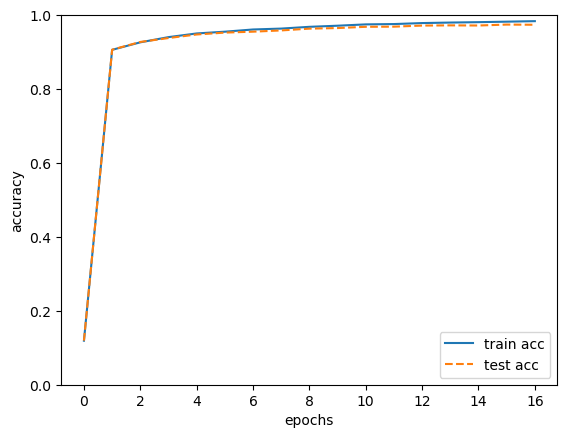

In [29]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#testing with other values

In [88]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [91]:
iterations = 50000
train_size = x_train.shape[0]
batch_size = 20
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [92]:
train_losses = []
train_accs = []
test_accs = []

In [93]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.11993333333333334, 0.1175
train acc, test_acc : 0.9463833333333334, 0.9453
train acc, test_acc : 0.9686666666666667, 0.9643
train acc, test_acc : 0.9762166666666666, 0.9699
train acc, test_acc : 0.9772166666666666, 0.9698
train acc, test_acc : 0.9830166666666666, 0.971
train acc, test_acc : 0.98635, 0.9754
train acc, test_acc : 0.9871666666666666, 0.9749
train acc, test_acc : 0.9903, 0.9771
train acc, test_acc : 0.9929, 0.9769
train acc, test_acc : 0.9918, 0.9762
train acc, test_acc : 0.99245, 0.9745
train acc, test_acc : 0.996, 0.9777
train acc, test_acc : 0.9964833333333334, 0.9792
train acc, test_acc : 0.9970833333333333, 0.979
train acc, test_acc : 0.99685, 0.977
train acc, test_acc : 0.9979, 0.9786


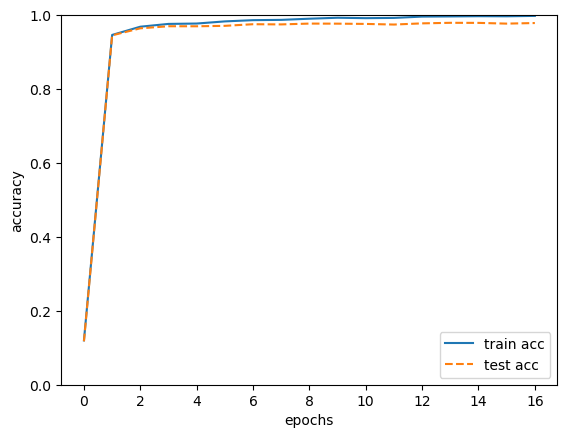

In [94]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#noticing a trend of smaller batch sizes = getting better guesses faster, definitely a trade off with performance

In [82]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [84]:
iterations = 20000
train_size = x_train.shape[0]
batch_size = 200
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [85]:
train_losses = []
train_accs = []
test_accs = []

In [86]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.10913333333333333, 0.1071
train acc, test_acc : 0.8876166666666667, 0.8915
train acc, test_acc : 0.9078833333333334, 0.9108
train acc, test_acc : 0.9176, 0.9214
train acc, test_acc : 0.9257166666666666, 0.927
train acc, test_acc : 0.9332666666666667, 0.9347
train acc, test_acc : 0.9393666666666667, 0.9386
train acc, test_acc : 0.9440166666666666, 0.9416
train acc, test_acc : 0.94825, 0.9448
train acc, test_acc : 0.95145, 0.9479
train acc, test_acc : 0.9550833333333333, 0.9515
train acc, test_acc : 0.9585166666666667, 0.9558
train acc, test_acc : 0.96095, 0.9574
train acc, test_acc : 0.9627666666666667, 0.9583
train acc, test_acc : 0.9649166666666666, 0.9608
train acc, test_acc : 0.9668333333333333, 0.9617
train acc, test_acc : 0.9693, 0.9649
train acc, test_acc : 0.9711833333333333, 0.9662
train acc, test_acc : 0.9719, 0.9674
train acc, test_acc : 0.9732666666666666, 0.9681
train acc, test_acc : 0.97425, 0.9681
train acc, test_acc : 0.9757, 0.97
train acc, test_

KeyboardInterrupt: 

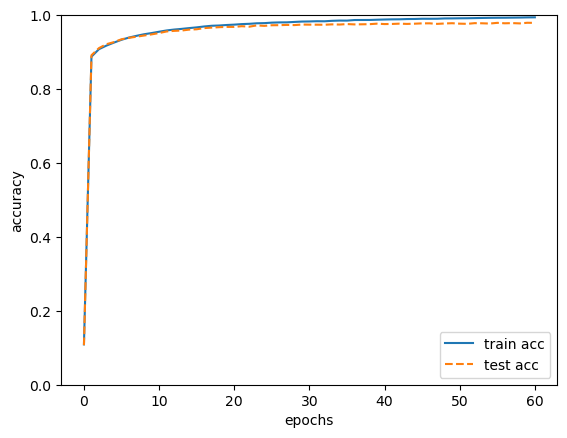

In [87]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
import pickle

my_weight_pkl_file = 'Moore_mnist_model.pkl'

In [31]:
with open(f'{my_weight_pkl_file}', 'wb') as f:
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done.') 

Pickle: jaerock_weights.pkl is being created.
Done.


In [32]:
network.params = None

#Using your own TwoLayerNet model

In [33]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [34]:
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

network.update_layers()

In [35]:
from mnist import Mnist

In [36]:
mnist = Mnist()
(_, _), (x_test, y_test) = mnist.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [37]:
import matplotlib.pyplot as plt

In [57]:
y_hat = network.predict(x_test[0:100])

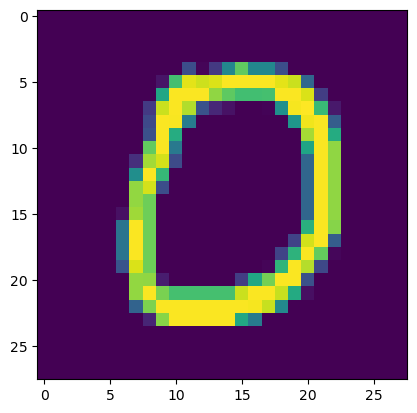

In [39]:
plt.imshow(x_test[10].reshape(28,28))

In [40]:
y_hat[10]

array([13.35846378, -4.0343346 ,  5.18381186, -1.73975728, -8.14171292,
       -0.27401666,  1.36983358, -2.43598307, -4.8036962 ,  1.37918309])

In [41]:
np.argmax(y_hat[10])

0

In [42]:
np.argmax(y_test[10])

0

In [44]:
from PIL import Image

#Testing handwritten numbers

In [45]:
img = Image.open("Custom MNIST Sample/Digit 9/9_4.png").convert('L')
img = img.resize((28,28))
img = np.array(img)
img = 255.0 - img
img = (img - np.min(img))*(255/(np.max(img)-np.min(img)))
img = img.astype(np.float32)/255
img = img.flatten()

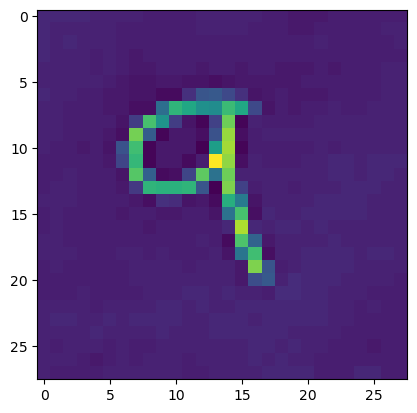

In [46]:
plt.imshow(img.reshape(28,28))

In [55]:
y_hat = network.predict(img)

ValueError: shapes (784,1) and (784,100) not aligned: 1 (dim 1) != 784 (dim 0)

In [ ]:
y_hat = network.predict(img)

ValueError: cannot reshape array of size 784 into shape (784,100)